In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# renaming the cols
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# label encoding target
lm = LabelEncoder()
data['target'] = lm.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
data.duplicated().sum()

403

In [11]:
# remove duplicates 
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [12]:
data.shape

(5169, 2)

## 2. EDA

In [13]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

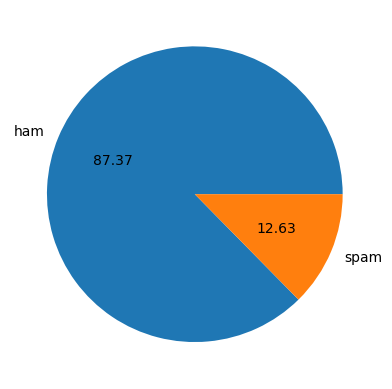

In [14]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# num of char
data['num_char'] = data['text'].apply(len)
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# num of words
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
data['num_sent'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# ham
data[data['target']==0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# spam
data[data['target']==1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

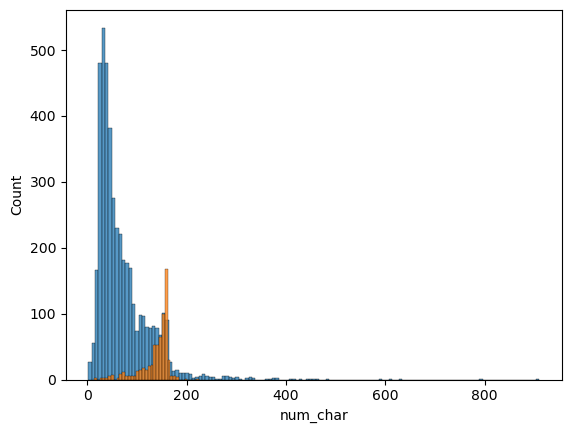

In [24]:
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

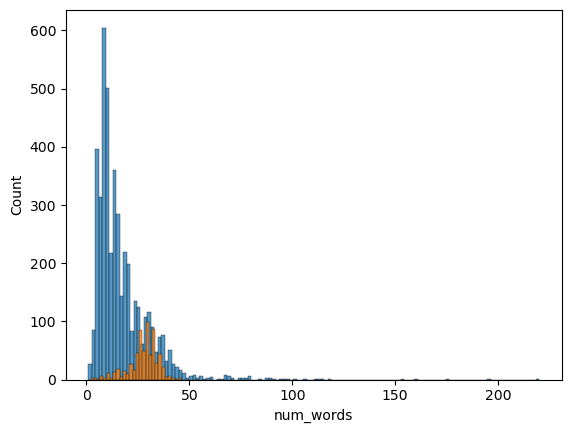

In [25]:
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'])

<Axes: xlabel='num_sent', ylabel='Count'>

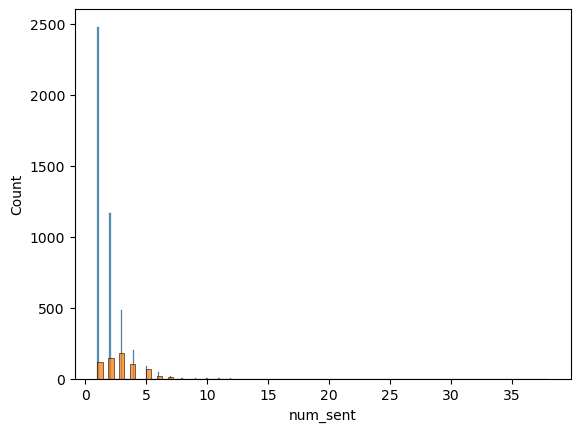

In [26]:
sns.histplot(data[data['target']==0]['num_sent'])
sns.histplot(data[data['target']==1]['num_sent'])

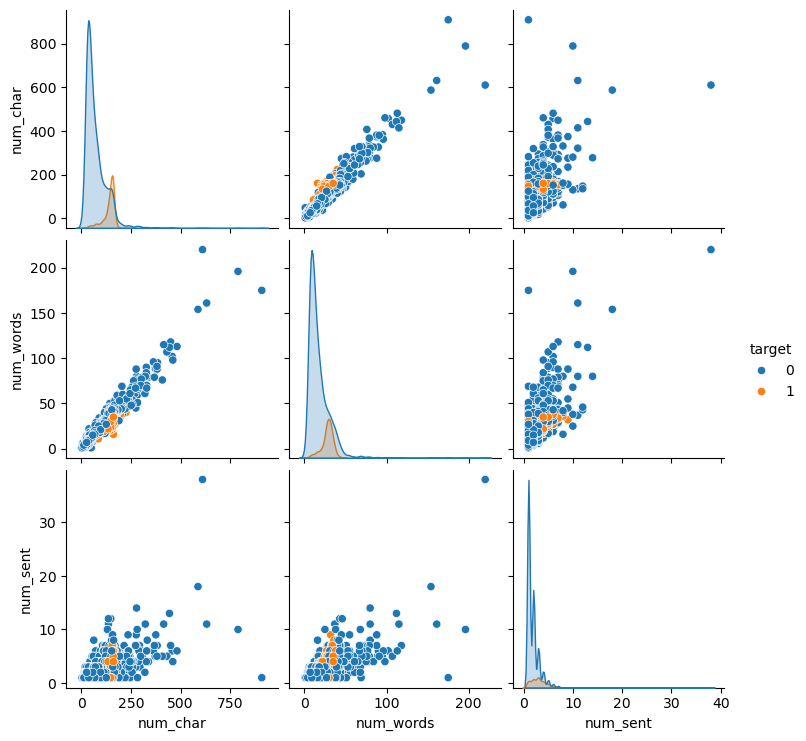

In [27]:
sns.pairplot(data, hue='target')

<Axes: >

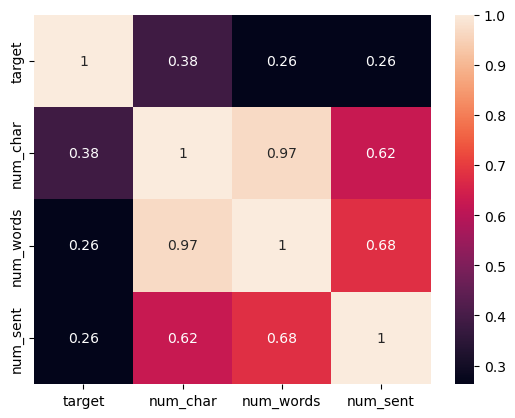

In [28]:
sns.heatmap(data[['target', 'num_char', 'num_words', 'num_sent']].corr(), annot=True)

## 3. Data preprocessing
####    * Lower case
####    * Tokenixation
####    * Remove special chars
####    * Remove stop words and puncuation
####    * Stemming

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
           y.append(i) 

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [31]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud

In [33]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

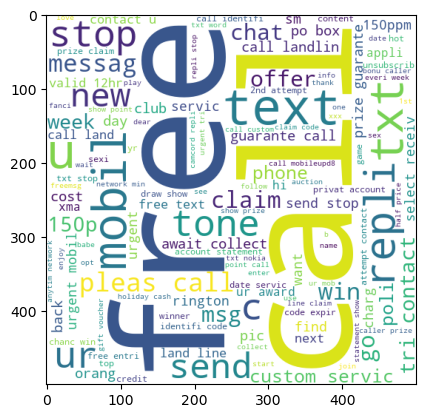

In [34]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

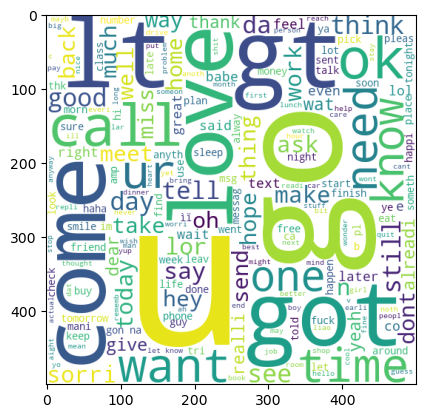

In [35]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

## Model building

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()

In [37]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [38]:
X.shape

(5169, 6708)

In [39]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [43]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [45]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [46]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [47]:
# Testing on all major classifier models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgc = XGBClassifier(n_estimators=50, random_state=2)

In [50]:
models = {'LRC': lrc,
         'SVM': svc,
         'MNB': mnb,
         'DTC': dtc,
         'KNC': knc,
         'RFC': rfc,
         'ABC': abc,
         'BC': bc,
         'ETC': etc,
         'GBC': gbc,
         'XGC': xgc}

In [51]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [52]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9729206963249516, 0.9741379310344828)

In [53]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)    

In [54]:
performance_data = pd.DataFrame({'Models': models.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_data

,Models,Accuracy,Precision
2,MNB,0.959381,1.000000
4,KNC,0.900387,1.000000
5,RFC,0.971954,1.000000
8,ETC,0.972921,0.982456
1,SVM,0.972921,0.974138
10,XGC,0.972921,0.943548
0,LRC,0.951644,0.940000
9,GBC,0.952611,0.923810
7,BC,0.958414,0.862595
3,DTC,0.936170,0.846154


In [56]:
# test of unknown data

In [132]:
unknown = pd.DataFrame([['Get upto ₹15k Scholarships & perks, win, prize, free']], columns=['text'])
unknown

,text
0,"Get upto ₹15k Scholarships & perks, win, prize..."


In [133]:
unknown['text'] = unknown['text'].apply(transform_text)
unknown

,text
0,get upto scholarship perk win prize free


In [134]:
z = tfidf.transform(unknown['text']).toarray()
z

array([[0., 0., 0., ..., 0., 0., 0.]])

In [135]:
result = rfc.predict(z)
result

array([1])

In [136]:
if result == 1:
    print('Spam')
else:
    print('Not Spam')

Spam
